In [42]:
# 特征降维-皮尔逊相关系数

In [43]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
# 读取数据
data = pd.read_csv("../data/factor_returns.csv")
data

,index,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense,date,return
0,000001.XSHE,5.9572,1.1818,8.525255e+10,0.8008,14.9403,1.211445e+12,2.0100,2.070140e+10,1.088254e+10,2012-01-31,0.027657
1,000002.XSHE,7.0289,1.5880,8.411336e+10,1.6463,7.8656,3.002521e+11,0.3260,2.930837e+10,2.378348e+10,2012-01-31,0.082352
2,000008.XSHE,-262.7461,7.0003,5.170455e+08,-0.5678,-0.5943,7.705178e+08,-0.0060,1.167983e+07,1.203008e+07,2012-01-31,0.099789
3,000060.XSHE,16.4760,3.7146,1.968046e+10,5.6036,14.6170,2.800916e+10,0.3500,9.189387e+09,7.935543e+09,2012-01-31,0.121595
4,000069.XSHE,12.5878,2.5616,4.172721e+10,2.8729,10.9097,8.124738e+10,0.2710,8.951453e+09,7.091398e+09,2012-01-31,-0.002681
...,...,...,...,...,...,...,...,...,...,...,...,...
2313,601888.XSHG,25.0848,4.2323,2.274800e+10,10.7833,15.4895,2.784450e+10,0.8849,1.148170e+10,1.041419e+10,2012-11-30,0.060727
2314,601901.XSHG,59.4849,1.6392,2.281400e+10,1.2960,2.4512,3.810122e+10,0.0900,1.731713e+09,1.089783e+09,2012-11-30,0.179148
2315,601933.XSHG,39.5523,4.0052,1.702434e+10,3.3440,8.0679,2.420817e+10,0.2200,1.789082e+10,1.749295e+10,2012-11-30,0.137134
2316,601958.XSHG,52.5408,2.4646,3.287910e+10,2.7444,2.9202,3.883803e+10,0.1210,6.465392e+09,6.009007e+09,2012-11-30,0.149167


In [45]:
# 计算某两个变量之间的相关系数
r1 = pearsonr(data["pe_ratio"], data["pb_ratio"])
r1

PearsonRResult(statistic=-0.004389322779936271, pvalue=0.8327205496590723)

In [46]:
# 计算data["revenue"]与data["total_expense"]的相关性
r2 = pearsonr(data["revenue"], data["total_expense"])
r2

PearsonRResult(statistic=0.9958450413136115, pvalue=0.0)

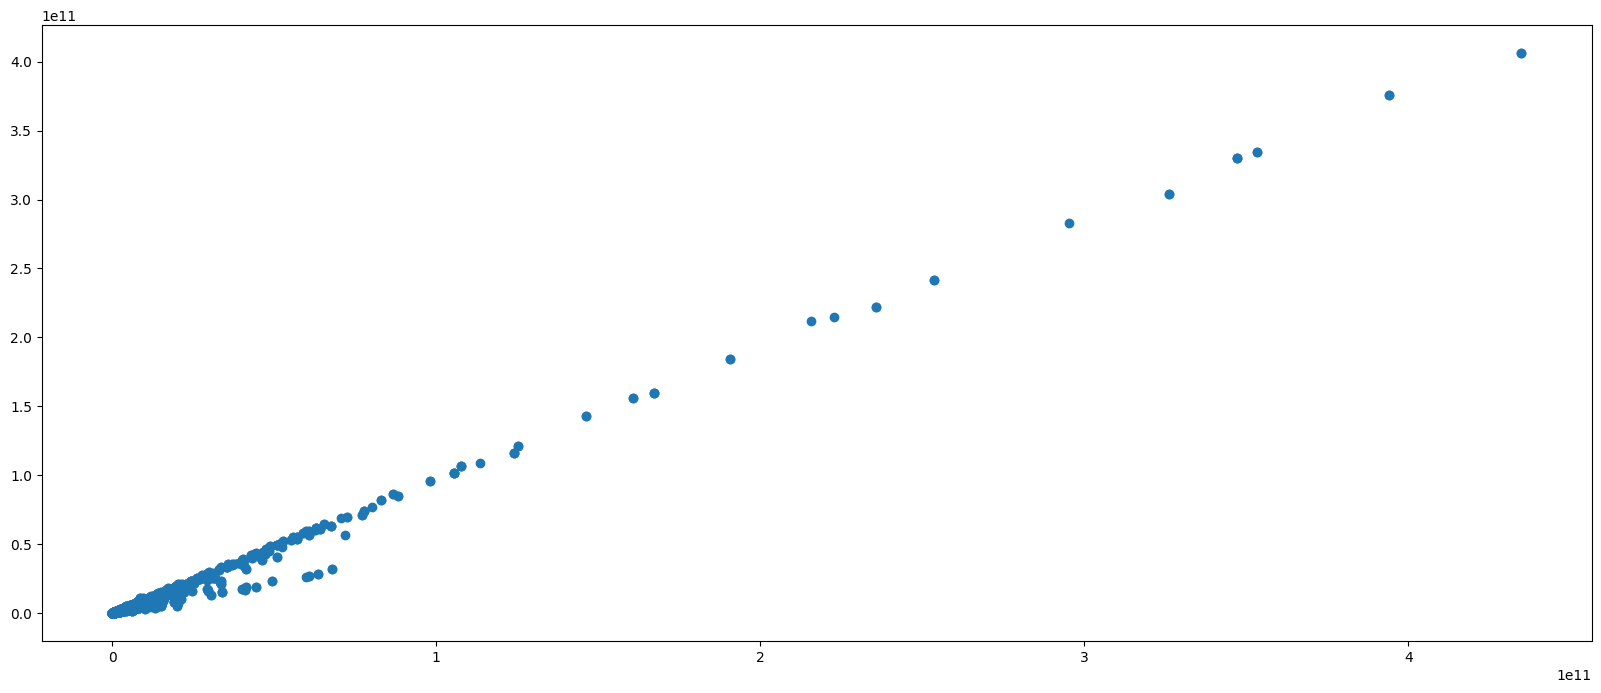

In [47]:
# data["revenue"]与data["total_expense"]的散点图
plt.figure(figsize=[20, 8], dpi=100)
plt.scatter(data["revenue"], data["total_expense"])
plt.show()

### 热力图

In [48]:
# 查看数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2318 entries, 0 to 2317
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       2318 non-null   object 
 1   pe_ratio                    2318 non-null   float64
 2   pb_ratio                    2318 non-null   float64
 3   market_cap                  2318 non-null   float64
 4   return_on_asset_net_profit  2318 non-null   float64
 5   du_return_on_equity         2318 non-null   float64
 6   ev                          2318 non-null   float64
 7   earnings_per_share          2318 non-null   float64
 8   revenue                     2318 non-null   float64
 9   total_expense               2318 non-null   float64
 10  date                        2318 non-null   object 
 11  return                      2318 non-null   float64
dtypes: float64(10), object(2)
memory usage: 235.4+ KB


In [49]:
# 数据选择
data = data.iloc[:, 1:]
data

,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense,date,return
0,5.9572,1.1818,8.525255e+10,0.8008,14.9403,1.211445e+12,2.0100,2.070140e+10,1.088254e+10,2012-01-31,0.027657
1,7.0289,1.5880,8.411336e+10,1.6463,7.8656,3.002521e+11,0.3260,2.930837e+10,2.378348e+10,2012-01-31,0.082352
2,-262.7461,7.0003,5.170455e+08,-0.5678,-0.5943,7.705178e+08,-0.0060,1.167983e+07,1.203008e+07,2012-01-31,0.099789
3,16.4760,3.7146,1.968046e+10,5.6036,14.6170,2.800916e+10,0.3500,9.189387e+09,7.935543e+09,2012-01-31,0.121595
4,12.5878,2.5616,4.172721e+10,2.8729,10.9097,8.124738e+10,0.2710,8.951453e+09,7.091398e+09,2012-01-31,-0.002681
...,...,...,...,...,...,...,...,...,...,...,...
2313,25.0848,4.2323,2.274800e+10,10.7833,15.4895,2.784450e+10,0.8849,1.148170e+10,1.041419e+10,2012-11-30,0.060727
2314,59.4849,1.6392,2.281400e+10,1.2960,2.4512,3.810122e+10,0.0900,1.731713e+09,1.089783e+09,2012-11-30,0.179148
2315,39.5523,4.0052,1.702434e+10,3.3440,8.0679,2.420817e+10,0.2200,1.789082e+10,1.749295e+10,2012-11-30,0.137134
2316,52.5408,2.4646,3.287910e+10,2.7444,2.9202,3.883803e+10,0.1210,6.465392e+09,6.009007e+09,2012-11-30,0.149167


In [50]:
# 计算相关系数
data_corr = data.corr()
data_corr

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12552\3674111161.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense,return
pe_ratio,1.000000,-0.004389,-0.068861,-0.066009,-0.082364,-0.046159,-0.072082,-0.058693,-0.055551,-0.025527
pb_ratio,-0.004389,1.000000,0.009336,0.445381,0.291367,-0.183232,0.198708,-0.177671,-0.173339,-0.019918
market_cap,-0.068861,0.009336,1.000000,0.214774,0.316288,0.565533,0.524179,0.440653,0.386550,-0.036255
return_on_asset_net_profit,-0.066009,0.445381,0.214774,1.000000,0.818697,-0.101225,0.635933,0.038582,0.027014,0.068165
du_return_on_equity,-0.082364,0.291367,0.316288,0.818697,1.000000,0.118807,0.651996,0.163214,0.135412,0.097398
ev,-0.046159,-0.183232,0.565533,-0.101225,0.118807,1.000000,0.196033,0.224363,0.149857,0.013362
earnings_per_share,-0.072082,0.198708,0.524179,0.635933,0.651996,0.196033,1.000000,0.141473,0.105022,0.052517
revenue,-0.058693,-0.177671,0.440653,0.038582,0.163214,0.224363,0.141473,1.000000,0.995845,0.041463
total_expense,-0.055551,-0.173339,0.386550,0.027014,0.135412,0.149857,0.105022,0.995845,1.000000,0.038365
return,-0.025527,-0.019918,-0.036255,0.068165,0.097398,0.013362,0.052517,0.041463,0.038365,1.000000


<Axes: >

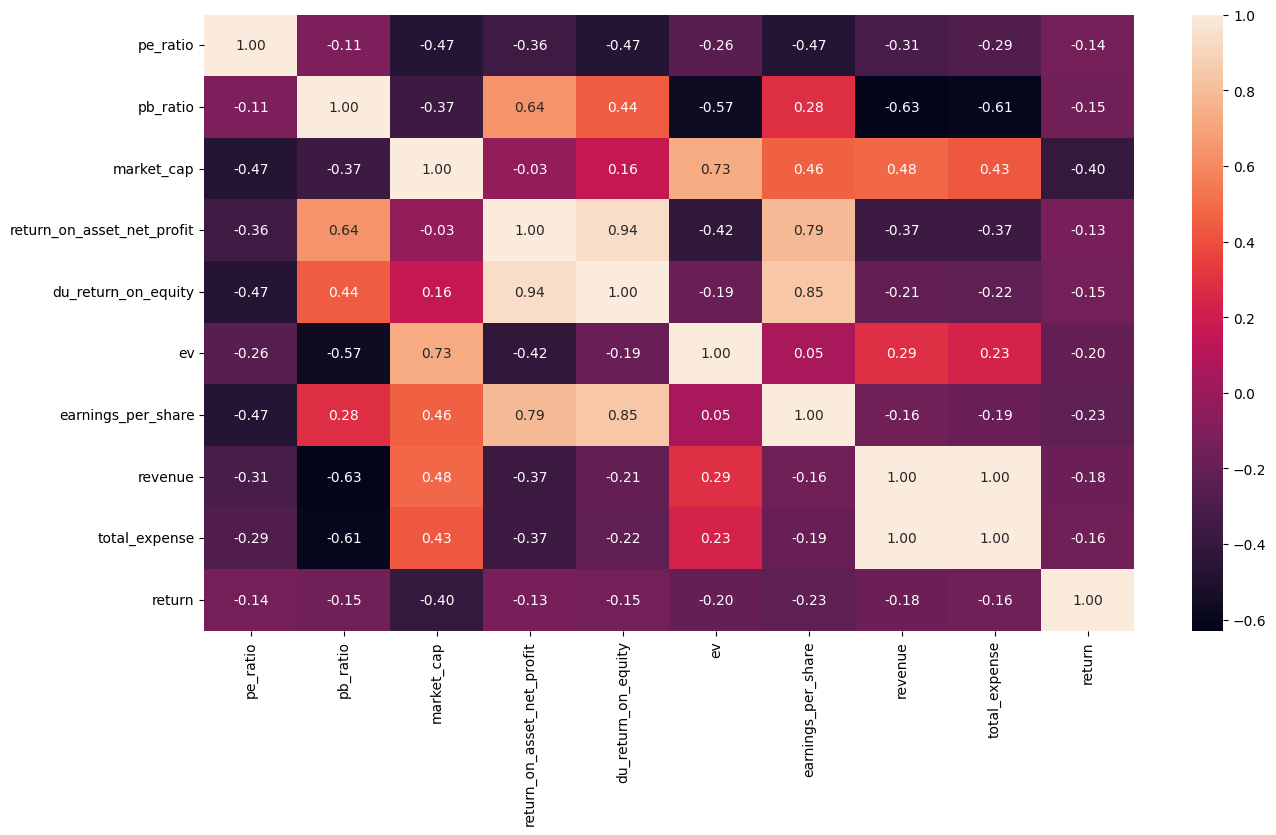

In [54]:
# 画热力图
plt.figure(figsize=[15, 8])
# fmt:数据格式，annot:是否显示数字，cmap:热力图样式
sns.heatmap(data_corr.corr(), annot=True, fmt=".2f")

In [59]:
# 查看计算相关系数的特征名称
data_corr.corr().index.values

array(['pe_ratio', 'pb_ratio', 'market_cap', 'return_on_asset_net_profit',
       'du_return_on_equity', 'ev', 'earnings_per_share', 'revenue',
       'total_expense', 'return'], dtype=object)

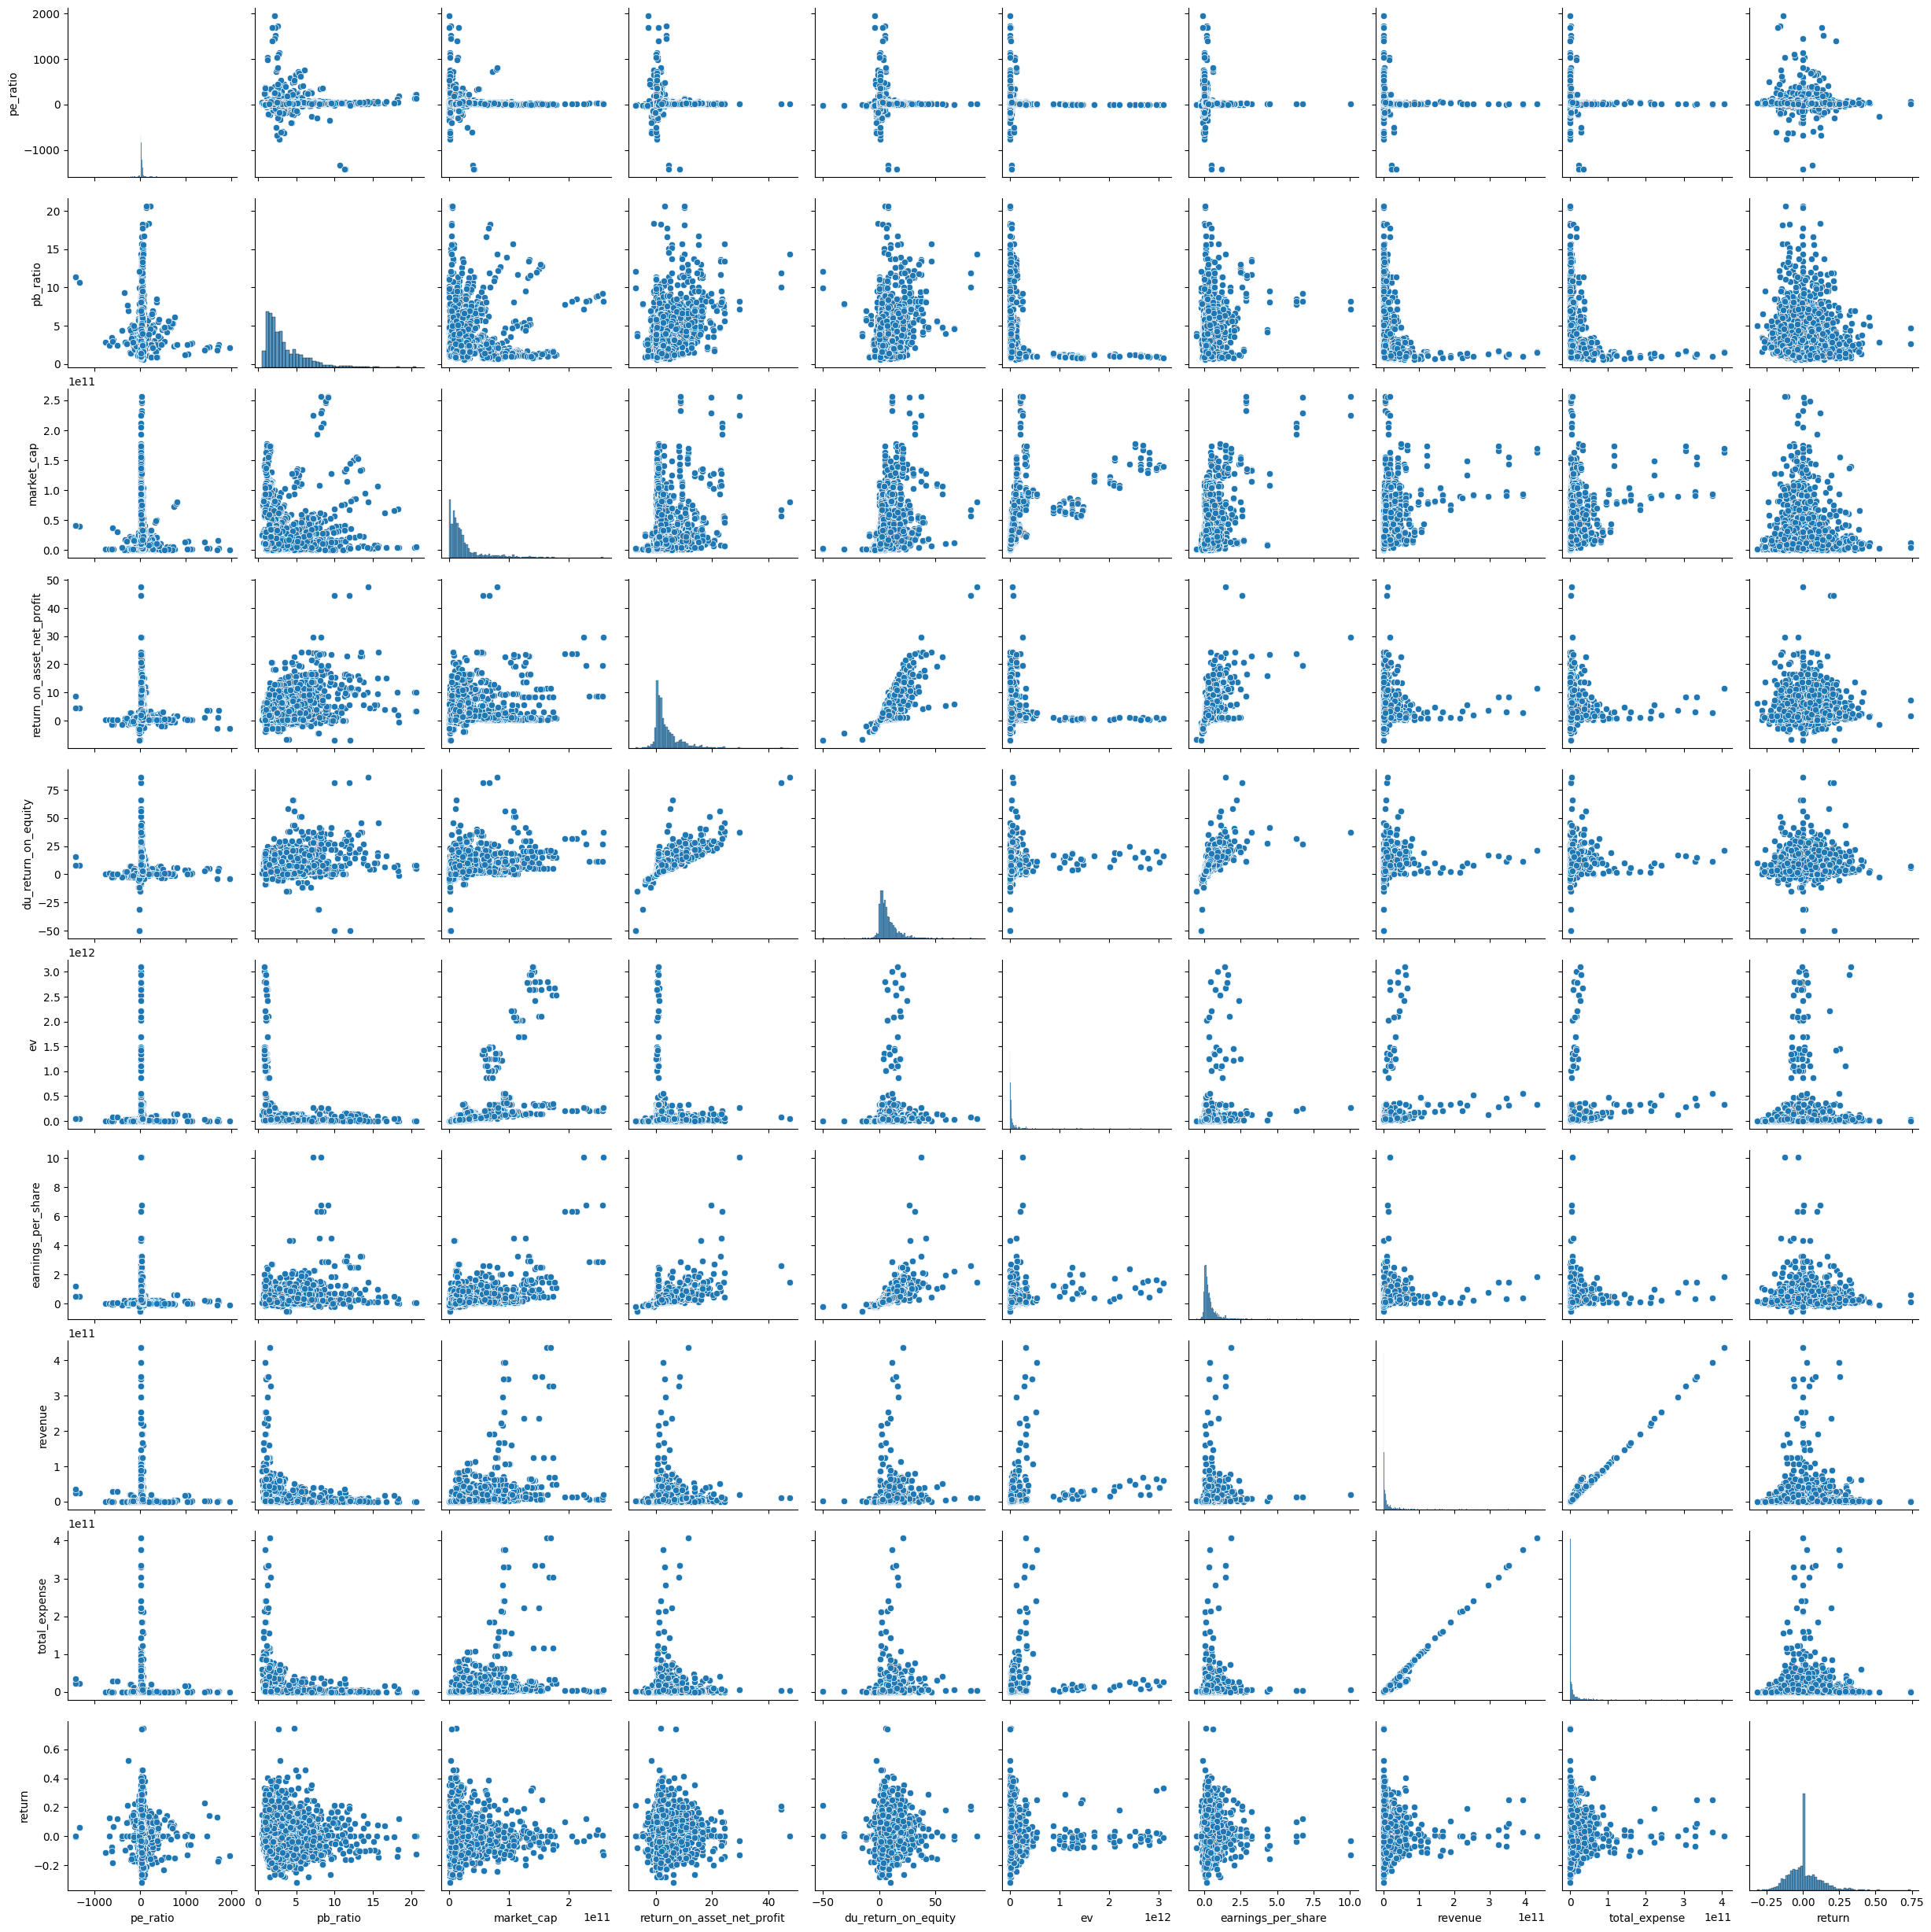

In [60]:
# 特征关联性分析
# sns.pairplot(data, vars=data_corr.corr().index.values)
sns.pairplot(data)